# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head(5)
city_data_df_count=city_data_df.groupby(city_data_df["type"]).sum()["driver_count"]
city_data_df_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [3]:
ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides_df=pyber_data_df.groupby(pyber_data_df["type"]).count()["ride_id"]
total_rides_df

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers_df=city_data_df.groupby(city_data_df["type"]).sum()["driver_count"]
total_drivers_df

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
total_driver_df=pyber_data_df.groupby(pyber_data_df["type"]).sum()["driver_count"]
total_driver_df

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
total_fare_df=pyber_data_df.groupby(pyber_data_df["type"]).sum()["fare"]
total_fare_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fare=total_fare_df/total_rides_df
avg_ride_fare


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_driver_df=total_fare_df/total_drivers_df
avg_driver_df

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary={ "Total Rides":total_rides_df,
                  "Total Drivers":total_drivers_df,
               "Total Fares":total_fare_df,
               "Average Fare per Ride":avg_ride_fare,
               "Average Fare per Driver":avg_driver_df
                 }
pyber_summary_df=pd.DataFrame(pyber_summary)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  8. Format the columns.
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("{:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("{:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",34.62,55.49
Suburban,625,490,"$19,356.33",30.97,39.50
Urban,1625,2405,"$39,854.38",24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
new_pyber_data_df=pyber_data_df.copy()

In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_fare=new_pyber_data_df.groupby(["type","date"]).sum()["fare"]
date_fare_df=pd.DataFrame(date_fare)
date_fare_df.head(10)

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
      2019-01-08 06:19:45  19.39
      2019-01-09 15:30:35  31.84
      2019-01-11 04:39:27  16.42
      2019-01-14 07:09:17  18.05
      2019-01-14 15:58:48  54.10

In [16]:
from datetime import datetime

In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_fare_df=date_fare_df.reset_index()
date_fare_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_fare_pivot=pd.pivot_table(date_fare_df, index=["date"],columns=["type"])
date_fare_pivot=date_fare_pivot.reset_index("date")
date_fare_pivot.index.name=None
date_fare_pivot.head(10)

date   fare                
type                       Rural Suburban  Urban
0     2019-01-01 00:08:16    NaN      NaN  37.91
1     2019-01-01 00:46:46    NaN    47.74    NaN
2     2019-01-01 02:07:24    NaN    24.07    NaN
3     2019-01-01 03:46:50    NaN      NaN   7.57
4     2019-01-01 05:23:21    NaN      NaN  10.75
5     2019-01-01 09:45:36  43.69      NaN    NaN
6     2019-01-01 12:32:48    NaN    25.56    NaN
7     2019-01-01 14:40:14    NaN      NaN   5.42
8     2019-01-01 14:42:25    NaN      NaN  12.31
9     2019-01-01 14:52:06    NaN    31.15    NaN

In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range_df = date_fare_pivot.loc[(date_fare_pivot["date"] >= "2019-01-01") & (date_fare_pivot["date"] <= "2019-04-29")]
date_range_df

date  fare                
type                      Rural Suburban  Urban
0     2019-01-01 00:08:16   NaN      NaN  37.91
1     2019-01-01 00:46:46   NaN    47.74    NaN
2     2019-01-01 02:07:24   NaN    24.07    NaN
3     2019-01-01 03:46:50   NaN      NaN   7.57
4     2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...   ...      ...    ...
2191  2019-04-28 14:28:36   NaN      NaN  11.46
2192  2019-04-28 16:29:16   NaN      NaN  36.42
2193  2019-04-28 17:26:52   NaN      NaN  31.43
2194  2019-04-28 17:38:09   NaN    34.87    NaN
2195  2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 4 columns]

In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_fare_pivot['date']=pd.to_datetime(date_fare_pivot['date'])
#date_fare_pivot.index=('date',inplace=False)
date_fare_pivot.dtypes

      type    
date              datetime64[ns]
fare  Rural              float64
      Suburban           float64
      Urban              float64
dtype: object

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
date_fare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (date, )          2375 non-null   datetime64[ns]
 1   (fare, Rural)     125 non-null    float64       
 2   (fare, Suburban)  625 non-null    float64       
 3   (fare, Urban)     1625 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 74.3 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_fare_pivot.index
#date_fare_pivot_weekly=date_fare_pivot.fare.resample('D').sum()

RangeIndex(start=0, stop=2375, step=1)

In [23]:
date_fare_pivot_sum=date_fare_pivot.resample("W", on="date").sum().reset_index()
date_fare_pivot_sum

date    fare                  
type              Rural Suburban    Urban
0    2019-01-06  187.92   721.60  1661.68
1    2019-01-13   67.65  1105.13  2050.43
2    2019-01-20  306.00  1218.20  1939.02
3    2019-01-27  179.69  1203.28  2129.51
4    2019-02-03  333.08  1042.79  2086.94
5    2019-02-10  115.80   974.34  2162.64
6    2019-02-17   95.82  1045.50  2235.07
7    2019-02-24  419.06  1412.74  2466.29
8    2019-03-03  175.14   858.46  2218.20
9    2019-03-10  303.94   925.27  2470.93
10   2019-03-17  163.39   906.20  2044.42
11   2019-03-24  189.76  1122.20  2368.37
12   2019-03-31  199.42  1045.06  1942.77
13   2019-04-07  501.24  1010.73  2356.70
14   2019-04-14  269.79   784.82  2390.72
15   2019-04-21  214.14  1149.27  2303.80
16   2019-04-28  191.85  1357.75  2238.29
17   2019-05-05  257.42  1164.78  2178.57
18   2019-05-12  156.82   308.21   610.03

In [24]:
date_fare_pivot_sum.describe()
date_fare_pivot_sum.dtypes

      type    
date              datetime64[ns]
fare  Rural              float64
      Suburban           float64
      Urban              float64
dtype: object

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



<IPython.core.display.Javascript object>


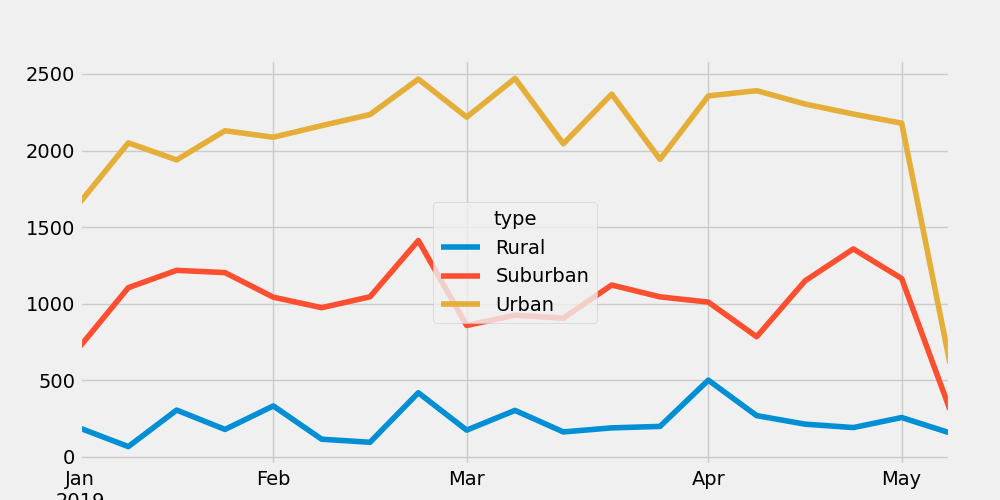

<AxesSubplot:xlabel='date'>

In [28]:
style.use('fivethirtyeight')

date_fare_pivot_sum.plot(x="date", y="fare", figsize=(10,5))

